In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('dataset-uci.csv')
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


## **Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [4]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [5]:

# missing values check
df.isna().sum()

Gallstone Status                                  0
Age                                               0
Gender                                            0
Comorbidity                                       0
Coronary Artery Disease (CAD)                     0
Hypothyroidism                                    0
Hyperlipidemia                                    0
Diabetes Mellitus (DM)                            0
Height                                            0
Weight                                            0
Body Mass Index (BMI)                             0
Total Body Water (TBW)                            0
Extracellular Water (ECW)                         0
Intracellular Water (ICW)                         0
Extracellular Fluid/Total Body Water (ECF/TBW)    0
Total Body Fat Ratio (TBFR) (%)                   0
Lean Mass (LM) (%)                                0
Body Protein Content (Protein) (%)                0
Visceral Fat Rating (VFR)                         0
Bone Mass (B

In [6]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [7]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


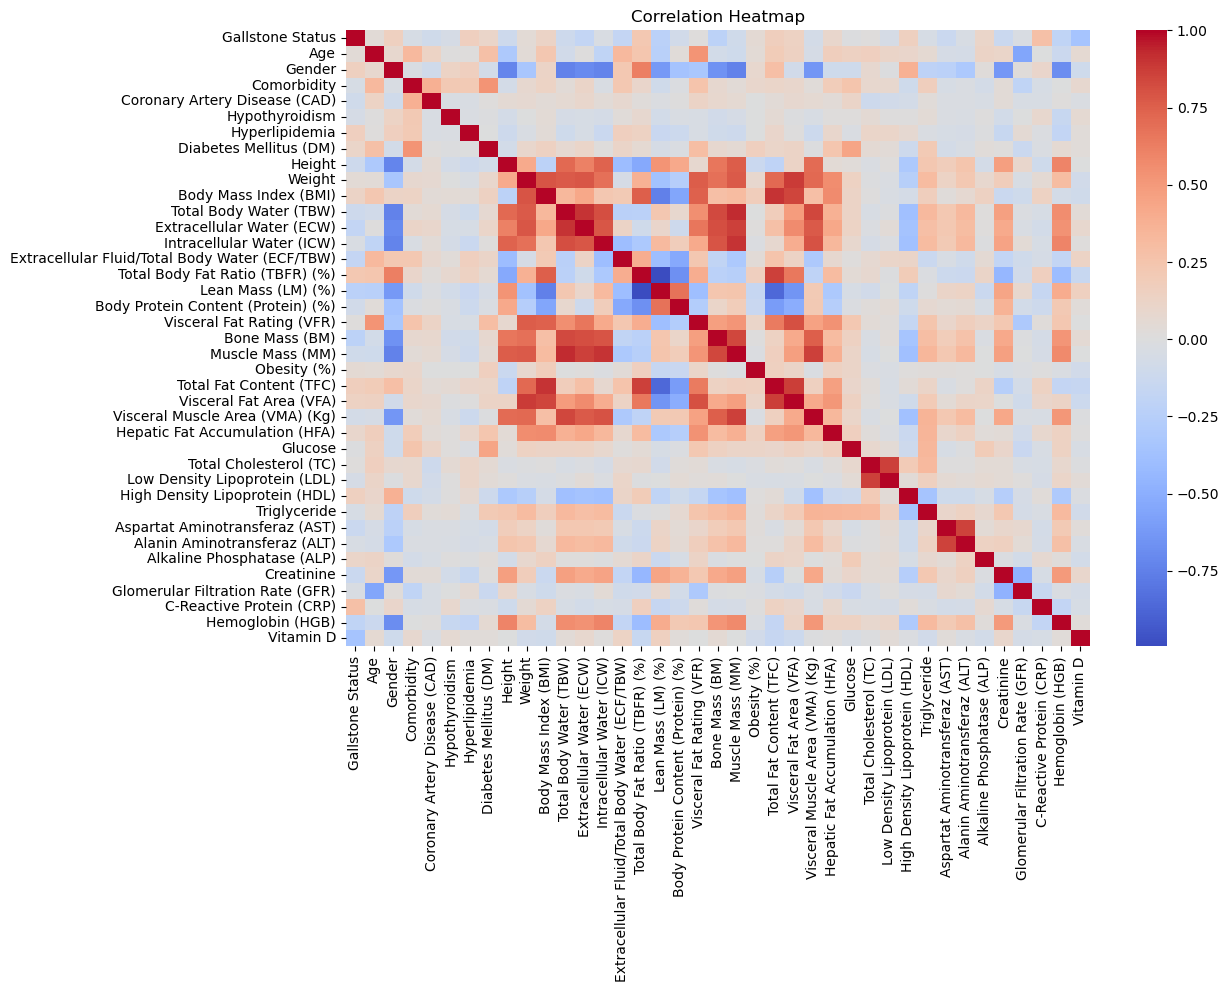

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X =df.drop("Gallstone Status", axis=1)
y = df["Gallstone Status"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Q2 — Model Implementation with Grid Search
# Algorithms: Logistic Regression, Decision Tree, Random Forest, XGBoost

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

# To store all results
all_results = []

# Helper function to run grid search

def run_grid_search(model, param_grid, model_name):
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        return_train_score=True
    )
    grid.fit(X_train, y_train)

    # full results as DataFrame
    results_df = pd.DataFrame(grid.cv_results_)
    results_df['model'] = model_name

    print(f"\n=== {model_name} — Best Params ===")
    print(grid.best_params_)
    print(f"Best mean CV accuracy: {grid.best_score_:.4f}")

    # keep only useful column
    cols = [
        'model',
        'params',
        'mean_train_score',
        'std_train_score',
        'mean_test_score',
        'std_test_score',
        'rank_test_score'
    ]
    all_results.append(results_df[cols])

    # best estimator
    best_model = grid.best_estimator_
    return best_model, results_df





In [ ]:
# 1) Logistic Regression
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

best_lr, lr_results = run_grid_search(log_reg, param_grid_lr, "Logistic Regression")


=== Logistic Regression — Best Params ===
{'C': 0.1, 'penalty': 'l2'}
Best mean CV accuracy: 0.7725


In [ ]:
# 2) Decision Tree
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_dt, dt_results = run_grid_search(dt, param_grid_dt, "Decision Tree")


=== Decision Tree — Best Params ===
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best mean CV accuracy: 0.6980


In [ ]:
# 3) Random Forest
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

best_rf, rf_results = run_grid_search(rf, param_grid_rf, "Random Forest")


=== Random Forest — Best Params ===
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
Best mean CV accuracy: 0.7882


In [ ]:
# 4) XGBoost
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

best_xgb, xgb_results = run_grid_search(xgb, param_grid_xgb, "XGBoost")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:35:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:35:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:35:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:35:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


=== XGBoost — Best Params ===
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best mean CV accuracy: 0.7765


In [ ]:
# Combine all grid results

all_results_df = pd.concat(all_results, ignore_index=True)

# Sort by mean_test_score (validation accuracy) descending
all_results_df_sorted = all_results_df.sort_values(
    by=['mean_test_score'],
    ascending=False
)

print("\n=== Top 10 Configurations Across All Models (by CV accuracy) ===")
all_results_df_sorted.head(10)



=== Top 10 Configurations Across All Models (by CV accuracy) ===


,model,params,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
64,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'm...",1.000000,0.000000,0.788235,0.063718,1
65,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'm...",1.000000,0.000000,0.788235,0.071669,1
51,Random Forest,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.970588,0.014207,0.788235,0.050221,1
47,Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.970588,0.007594,0.788235,0.056011,4
50,Random Forest,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.960784,0.010740,0.784314,0.051131,5
46,Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.964706,0.009998,0.784314,0.054055,5
67,Random Forest,"{'max_depth': None, 'max_features': 'log2', 'm...",1.000000,0.000000,0.780392,0.045395,7
63,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",1.000000,0.000000,0.780392,0.057368,7
59,Random Forest,"{'max_depth': 10, 'max_features': 'log2', 'min...",1.000000,0.000000,0.776471,0.050526,9
98,XGBoost,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",1.000000,0.000000,0.776471,0.056285,1


### **evaluating on test data for the best model of each algoritm**

In [17]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Store results in a dictionary
test_results = {}

def evaluate_model(model, name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} — Test Set Evaluation ===")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1-Score:", round(f1, 4))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Add to results table
    test_results[name] = [acc, prec, rec, f1]

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




=== Logistic Regression — Test Set Evaluation ===
Accuracy: 0.7656
Precision: 0.7857
Recall: 0.7097
F1-Score: 0.7458

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.79      0.71      0.75        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64



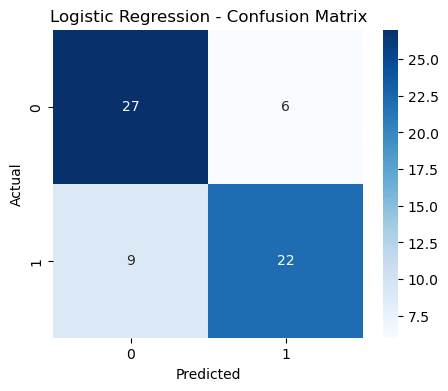


=== Decision Tree — Test Set Evaluation ===
Accuracy: 0.6562
Precision: 0.7368
Recall: 0.4516
F1-Score: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.85      0.72        33
           1       0.74      0.45      0.56        31

    accuracy                           0.66        64
   macro avg       0.68      0.65      0.64        64
weighted avg       0.68      0.66      0.64        64



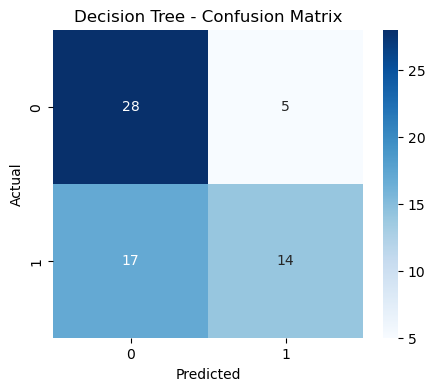


=== Random Forest — Test Set Evaluation ===
Accuracy: 0.7969
Precision: 0.7812
Recall: 0.8065
F1-Score: 0.7937

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.78      0.81      0.79        31

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64



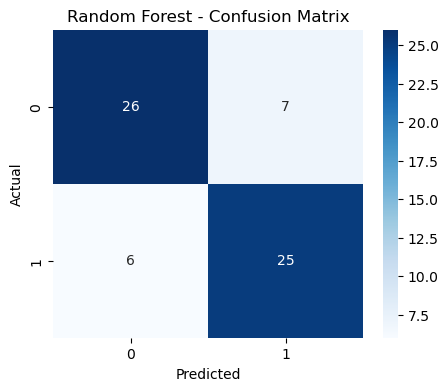


=== XGBoost — Test Set Evaluation ===
Accuracy: 0.8438
Precision: 0.8621
Recall: 0.8065
F1-Score: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.86      0.81      0.83        31

    accuracy                           0.84        64
   macro avg       0.85      0.84      0.84        64
weighted avg       0.84      0.84      0.84        64



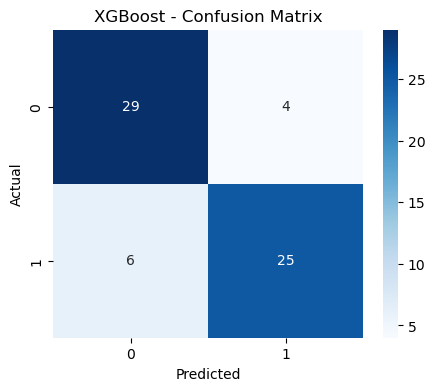

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.765625,0.785714,0.709677,0.745763
Decision Tree,0.656250,0.736842,0.451613,0.560000
Random Forest,0.796875,0.781250,0.806452,0.793651
XGBoost,0.843750,0.862069,0.806452,0.833333


In [18]:
# Evaluate all models
evaluate_model(best_lr, "Logistic Regression")
evaluate_model(best_dt, "Decision Tree")
evaluate_model(best_rf, "Random Forest")
evaluate_model(best_xgb, "XGBoost")

# Create comparison table
results_df = pd.DataFrame(test_results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
results_df


explainable AI

In [19]:
!pip -q install shap lime

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [20]:
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SHAP: XGBoost (global explanations)


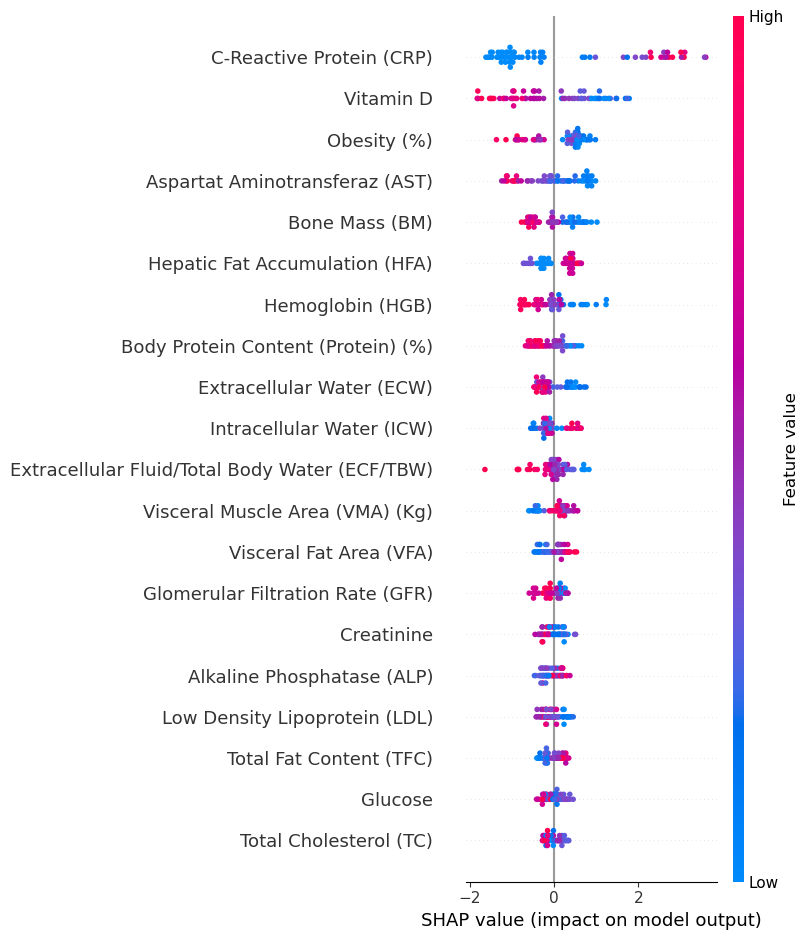

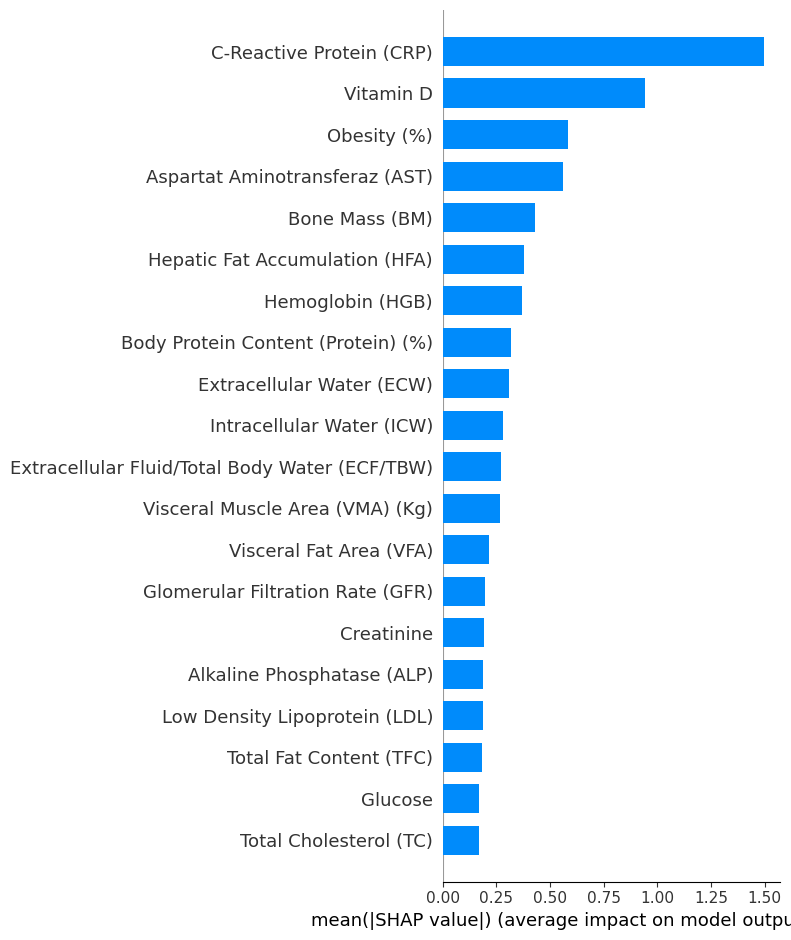

SHAP: Random Forest (global explanations)


In [ ]:
feature_names = X_train.columns.tolist()

# SHAP for XGBoost (best_xgb
print("SHAP: XGBoost (global explanations)")
explainer_xgb = shap.TreeExplainer(best_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Summary (beeswarm) plot: shows feature impact across all test samples
shap.summary_plot(shap_values_xgb, X_test, plot_type="dot")

# Bar plot: global feature importance by mean absolute SHAP value
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")


# ---- SHAP for Random Forest (best_rf) ----
print("SHAP: Random Forest (global explanations)")
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

In [ ]:
print("LIME: Local explanation for one test sample (using best_xgb)")
class_names = ["No Gallstone", "Gallstone"]

# LIME expects numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values

lime_explainer = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification",
    discretize_continuous=True
)

# Pick one test instance to explain fro,m idx
idx = 0
x_instance = X_test_np[idx]

# LIME needs a predict_proba function
exp = lime_explainer.explain_instance(
    data_row=x_instance,
    predict_fn=best_xgb.predict_proba,
    num_features=10
)

print(f"Explaining test instance index = {idx}")
print("Predicted probabilities [No Gallstone, Gallstone]:", best_xgb.predict_proba(X_test.iloc[[idx]])[0])

# Show explanation in notebook (text)
exp.show_in_notebook(show_table=True)



LIME: Local explanation for one test sample (using best_xgb)
Explaining test instance index = 0
Predicted probabilities [No Gallstone, Gallstone]: [0.1255359 0.8744641]


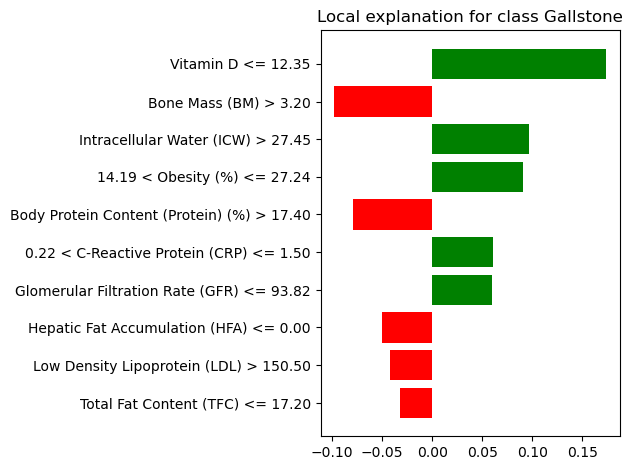

In [25]:
# Also show as a matplotlib figure
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()